<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana10/Genetico2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy

In [18]:
def Plotter(e):

  fig = plt.figure(figsize=(8,3))
  ax = fig.add_subplot(121)
  ax1 = fig.add_subplot(122)
  ax.set_title('{:.0f}'.format(e),fontsize=10)

  #ax.set_xlim(-6,6)
  #ax.set_ylim(-6,6)

  return ax,ax1

In [61]:

class Robot:

  # Definir el contructor
  def __init__(self, f, rate ,Id=0):

    # Id del robot
    self.Id = Id
    # Posicion robot
    self.r = np.random.uniform(-5,5,size=2)
    # Funcion a minimizar
    self.f = f
    # Fitness
    self.Fitness = self.f(self.r[0],self.r[1])
    # Mutation rate
    self.rate = rate

  # Setters
  def SetR(self,r):
    self.r = r

  def SetFitness(self):
    self.Fitness = self.f(self.r[0],self.r[1])

  # Getters
  def GetR(self):
    return self.r

  def GetFitness(self):
    return self.Fitness

  # Mutations
  def Mutate(self):
    self.r += np.random.normal(loc=0.,scale=self.rate,size=2)

In [62]:
# funcion a minimizar
def f(x,y):

  func = (x**2) - (y**2)

  # Es una penalización a la función de aptitud
  if x**2 + y**2 > 4:
    func -= 1000

  return func

rate = 0.05

In [63]:
r1 = Robot(f,rate)
r1.f(0.7,0.2)

0.44999999999999996

In [64]:
def GetRobots(N):

  Robots = []
  for i in range(N):
    r = Robot(f,rate,i)
    Robots.append(r)

  return Robots

In [65]:
def Genetic(Robots, epochs = 300):

  # Fitness en cada evolucion
  Fitness = np.array([])
  N = int(0.8*len(Robots))

  for e in range(epochs):

    clear_output(wait = True)
    print('Epoch: ',e)

    #ax,ax1 = Plotter(e)

    for i, p in enumerate(Robots):
      p.Mutate()
      p.SetFitness()

    score = [ (p.Fitness, p) for p in Robots ]
    #print(score)
    score = sorted(score, key=lambda x: x[0], reverse=True) # De menor a mayor

    Temp = [r[1] for i, r in enumerate(score) if i < N]

    for i, r in enumerate(Robots):
      j = i%N
      Robots[i] = copy.deepcopy(Temp[j])

    x = np.linspace(-5,5,50)
    y = np.linspace(-5,5,50)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros_like(X)
    for i in range(len(x)):
      for j in range(len(y)):
        Z[i,j] = f(x[i],y[j])
    #ax.contourf(X,Y,Z,cmap='jet')

    # Pintar los robots
    #for i, p in enumerate(Robots):
    #  pos = p.GetR()
    #  ax.scatter(pos[0], pos[1], marker='.' ,color='r')

    # Pintal el fitness promedio
    Fitness_ = [ p.GetFitness() for i, p in enumerate(Robots) ]
    #print(Fitness_)
    Fitness = np.append(Fitness, np.mean(Fitness_))
    #ax1.plot(Fitness,color='k')
    print(Fitness[-1])

    #plt.show()
    plt.pause(0.001)

In [66]:
Robots = GetRobots(500)
Genetic(Robots)

Epoch:  299
3.686788037376735


In [67]:
Robots[0].GetR()

array([ 1.99828734, -0.04305468])

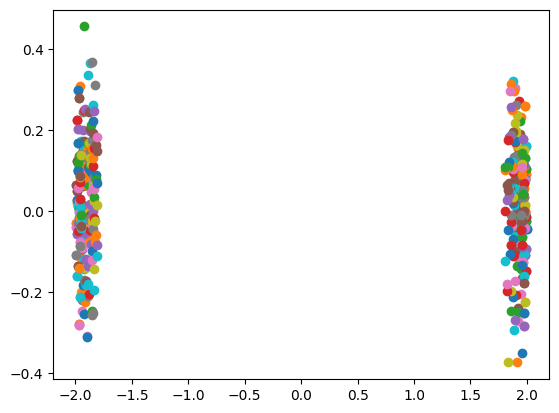

In [68]:
for i, p in enumerate(Robots):
  plt.scatter(p.GetR()[0],p.GetR()[1])